In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/workspaces/py-final/data-2.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,40,15000,494,Employed,High School,20,18570,48,Single,...,1250.000000,0.919582,3,8897,0.266570,0.245610,611.189790,0.854552,0,55.0
1,2018-01-02,39,55666,595,Employed,Associate,18,16939,48,Single,...,4638.833333,0.839647,5,31765,0.214439,0.236277,548.761570,0.140070,0,56.0
2,2018-01-03,32,21502,570,Employed,High School,8,18087,60,Single,...,1791.833333,0.714700,3,135709,0.238087,0.190470,469.654226,0.705230,0,50.0
3,2018-01-04,44,34721,582,Employed,High School,26,32852,108,Married,...,2893.416667,0.681132,4,118956,0.286852,0.338475,974.974937,0.547787,0,51.0
4,2018-01-05,41,18147,609,Employed,Bachelor,19,29345,24,Widowed,...,1512.250000,0.432673,5,253482,0.199845,0.217564,1518.836420,1.198106,0,46.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   AnnualIncome                2000 non-null   int64  
 3   CreditScore                 2000 non-null   int64  
 4   EmploymentStatus            2000 non-null   object 
 5   EducationLevel              2000 non-null   object 
 6   Experience                  2000 non-null   int64  
 7   LoanAmount                  2000 non-null   int64  
 8   LoanDuration                2000 non-null   int64  
 9   MaritalStatus               2000 non-null   object 
 10  NumberOfDependents          2000 non-null   int64  
 11  HomeOwnershipStatus         2000 non-null   object 
 12  MonthlyDebtPayments         2000 non-null   int64  
 13  CreditCardUtilizationRate   2000 

In [4]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df['ApplicationDate']=pd.to_datetime(df['ApplicationDate'])

In [7]:
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])


In [8]:
X = df.drop(columns=['ApplicationDate', 'LoanApproved'])  # Dropping non-relevant columns
Y = df['LoanApproved']  # Target variable
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 , shuffle=True)

#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (400, 34)
Y_Test Shape =  (400,)
X_Train Shape =  (1600, 34)
Y_Train Shape =  (1600,)


In [9]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

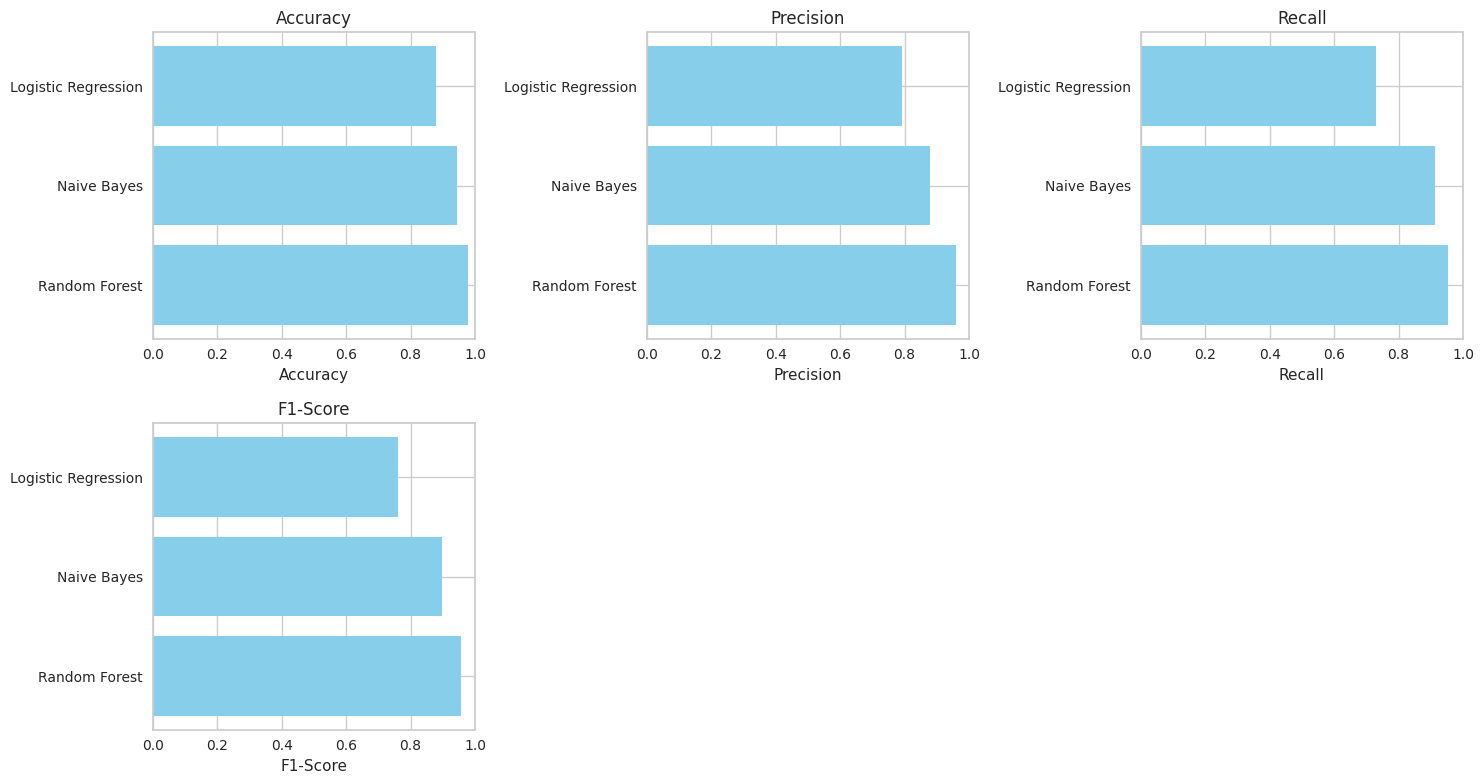

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model
for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred)
    recall = recall_score(y_test, obj_pred)
    f1 = f1_score(y_test, obj_pred)

    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

In [11]:
x = df.drop(columns=['ApplicationDate','RiskScore'])  
y = df['RiskScore']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=69)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    "MLP_Regressor": MLPRegressor(max_iter=500)
}

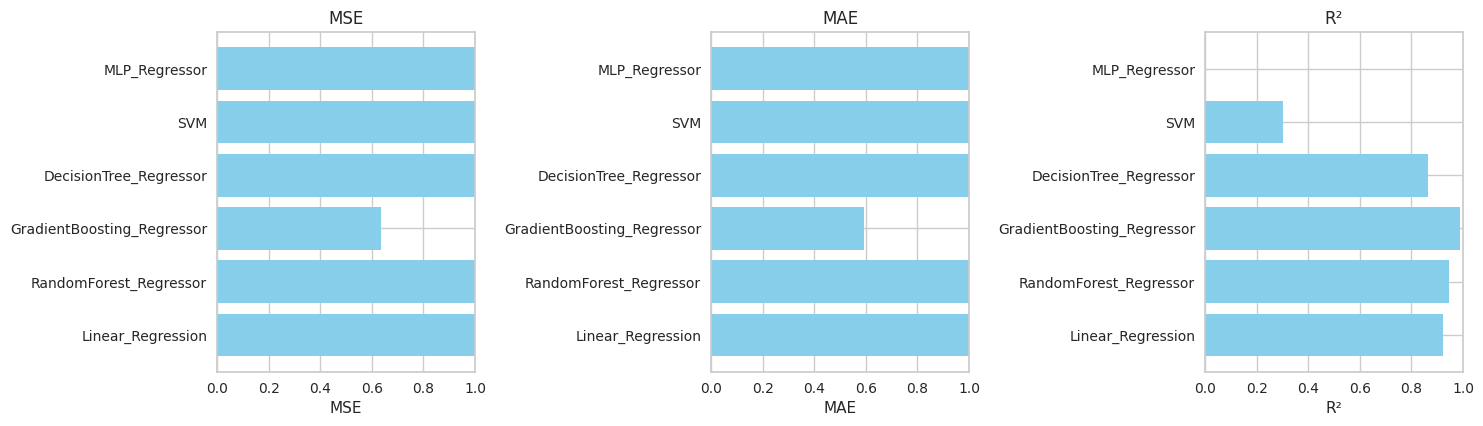

In [15]:
# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting each metric
metrics = ['MSE', 'MAE', 'R²']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

In [14]:
from joblib import dump

# Save the trained model (e.g., the best performing model from the regression task)
best_model = models["RandomForest_Regressor"]  # Replace with the desired model
dump(best_model, "risk_score_model.pkl")

['risk_score_model.pkl']